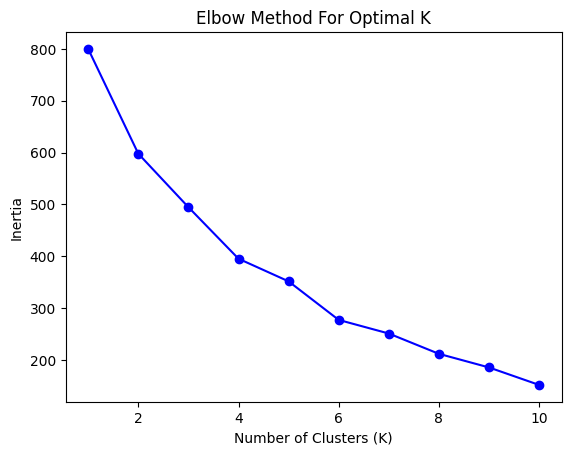

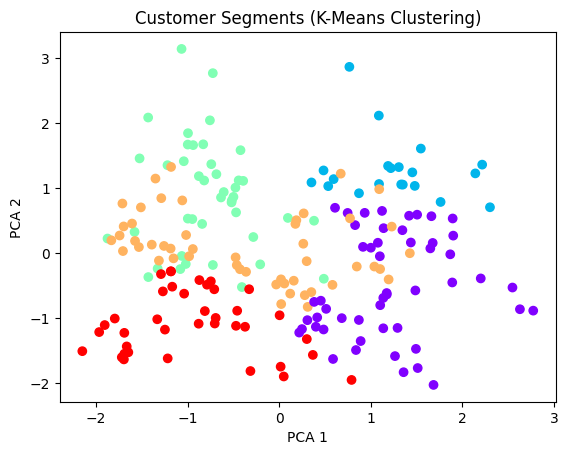

Silhouette Score: 0.27191023466188324


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # Replace with actual filename

# Drop 'CustomerID' since it's not useful for clustering
df = df.drop('CustomerID', axis=1)

# Convert 'Gender' column to numeric (Male=0, Female=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to determine best K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Fit KMeans with optimal K (e.g., K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to original DataFrame
df['Cluster'] = labels

# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments (K-Means Clustering)')
plt.show()

# Silhouette Score
score = silhouette_score(scaled_data, labels)
print("Silhouette Score:", score)

